In [2]:
from matplotlib import gridspec
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdate

In [3]:
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
con = create_engine('mysql+pymysql://root:@127.0.0.1:3306/LiuNian');

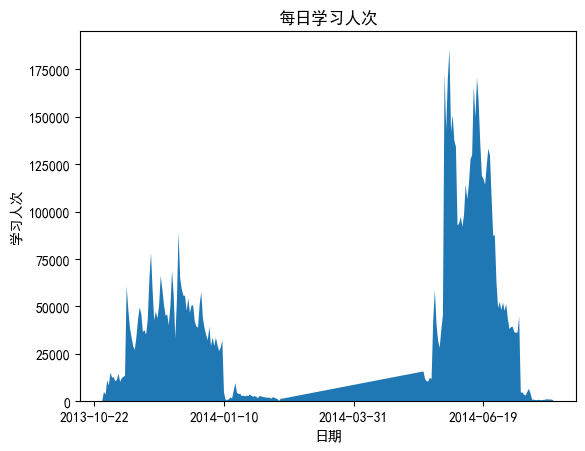

In [4]:
sql="select COUNT(*) learn_count,substr(TIME,1,10) time from LOG_TRAIN group by substr(TIME,1,10) order by substr(TIME,1,10)";
df=pd.read_sql(sql,con);
df["time"] = pd.to_datetime(df["time"])
fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))#设置时间标签显示格式
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=80))#间隔设置
ax.stackplot(df["time"],df["learn_count"]);
ax.set_ylabel("学习人次")
ax.set_xlabel("日期")
ax.set_title("每日学习人次")
plt.show();

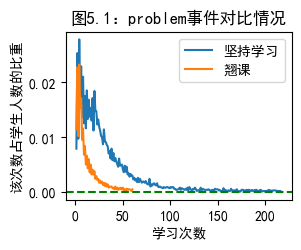

In [5]:
gs = gridspec.GridSpec(2, 2)
ax1 = plt.subplot(gs[0,0]);
problem0=pd.read_sql("select problem,count(problem)/24961 rate from statistical_information \
where lable=0 and problem<(select avg(problem)+3*stddev(problem) from statistical_information where lable=0) and PROBLEM>0 \
group by(problem) \
order by (problem)",con);
problem1=pd.read_sql("select problem,count(problem)/95581 rate from statistical_information \
where lable=1 and problem<(select avg(problem)+3*stddev(problem) from statistical_information where lable=1) and PROBLEM>0 \
group by(problem) \
order by(problem)",con);
ax1.plot(problem0["problem"],problem0["rate"],label="坚持学习");
ax1.plot(problem1["problem"],problem1["rate"],label="翘课");
ax1.set_xlabel("学习次数");
ax1.set_ylabel("该次数占学生人数的比重");
ax1.set_title("图5.1：problem事件对比情况")
ax1.axhline(y=0,c='g',ls='--')
plt.legend();

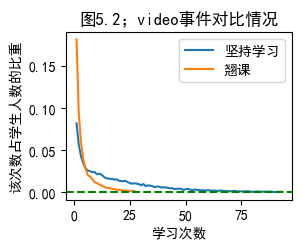

In [6]:
video0=pd.read_sql("select VIDEO,count(VIDEO)/24961 rate from statistical_information \
where lable=0 and VIDEO<(select avg(VIDEO)+3*stddev(VIDEO) from statistical_information where lable=0) and VIDEO>0 \
group by(VIDEO) \
order by(VIDEO)",con);
video1=pd.read_sql("select VIDEO,count(VIDEO)/95581 rate from statistical_information \
where lable=1 and VIDEO<(select avg(VIDEO)+3*stddev(VIDEO) from statistical_information where lable=1) and VIDEO>0 \
group by(VIDEO) \
order by(VIDEO)",con);
ax2 = plt.subplot(gs[0,1]);
ax2.plot(video0["VIDEO"],video0["rate"],label="坚持学习");
ax2.plot(video1["VIDEO"],video1["rate"],label="翘课");
ax2.set_xlabel("学习次数");
ax2.set_ylabel("该次数占学生人数的比重");
ax2.set_title("图5.2；video事件对比情况")
ax2.axhline(y=0,c='g',ls='--')
plt.legend();

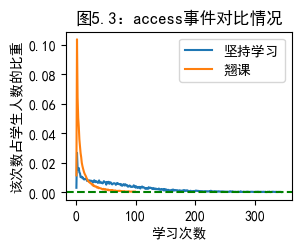

In [7]:
access0=pd.read_sql("select access1,count(access1)/24961 rate from statistical_information \
where lable=0 and access1<(select avg(access1)+3*stddev(access1) from statistical_information where lable=0) and access1>0 \
group by(access1) \
order by(access1)",con);
access1=pd.read_sql("select access1,count(access1)/95581 rate from statistical_information \
where lable=1 and access1<(select avg(access1)+3*stddev(access1) from statistical_information where lable=1) and access1>0 \
group by(access1) \
order by(access1)",con);
ax3 = plt.subplot(gs[1,0]);
ax3.plot(access0["access1"],access0["rate"],label="坚持学习");
ax3.plot(access1["access1"],access1["rate"],label="翘课");
ax3.set_xlabel("学习次数");
ax3.set_ylabel("该次数占学生人数的比重");
ax3.set_title("图5.3：access事件对比情况")
ax3.axhline(y=0,c='g',ls='--')
plt.legend();

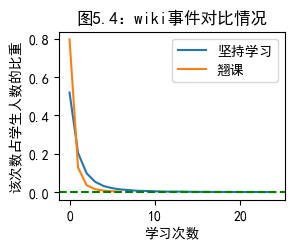

In [8]:
wiki0=pd.read_sql("select wiki,count(wiki)/24961 rate from statistical_information \
where lable=0 and wiki<(select avg(wiki)+3*stddev(wiki) from statistical_information where lable=0) and wiki>=0 \
group by(wiki) \
order by(wiki)",con);
wiki1=pd.read_sql("select wiki,count(wiki)/95581 rate from statistical_information \
where lable=1 and wiki<(select avg(wiki)+3*stddev(wiki) from statistical_information where lable=1) and wiki>=0 \
group by(wiki) \
order by(wiki)",con);
ax4 = plt.subplot(gs[1,1]);
ax4.plot(wiki0["wiki"],wiki0["rate"],label="坚持学习");
ax4.plot(wiki1["wiki"],wiki1["rate"],label="翘课");
ax4.set_xlabel("学习次数");
ax4.set_ylabel("该次数占学生人数的比重");
ax4.set_title("图5.4：wiki事件对比情况")
ax4.axhline(y=0,c='g',ls='--')
plt.legend();

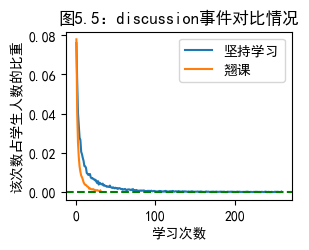

In [13]:
gs = gridspec.GridSpec(2, 2)
discussion0=pd.read_sql("select discussion,count(discussion)/24961 rate from statistical_information \
where lable=0 and discussion<(select avg(discussion)+3*stddev(discussion) from statistical_information where lable=0) and discussion>0 \
group by(discussion) \
order by(discussion)",con);
discussion1=pd.read_sql("select discussion,count(discussion)/95581 rate from statistical_information \
where lable=1 and discussion<(select avg(discussion)+3*stddev(discussion) from statistical_information where lable=1) and discussion>0 \
group by(discussion) \
order by(discussion)",con);
ax1 = plt.subplot(gs[0,0]);
ax1.plot(discussion0["discussion"],discussion0["rate"],label="坚持学习");
ax1.plot(discussion1["discussion"],discussion1["rate"],label="翘课");
ax1.set_xlabel("学习次数");
ax1.set_ylabel("该次数占学生人数的比重");
ax1.set_title("图5.5：discussion事件对比情况")
ax1.axhline(y=0,c='g',ls='--')
plt.legend();

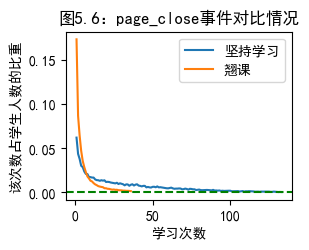

In [14]:
page_close0=pd.read_sql("select page_close,count(page_close)/24961 rate from statistical_information \
where lable=0 and page_close<(select avg(page_close)+3*stddev(page_close) from statistical_information where lable=0) and page_close>0 \
group by(page_close) \
order by(page_close)",con);
page_close1=pd.read_sql("select page_close,count(page_close)/95581 rate from statistical_information \
where lable=1 and page_close<(select avg(page_close)+3*stddev(page_close) from statistical_information where lable=1) and page_close>0 \
group by(page_close) \
order by(page_close)",con);
ax2 = plt.subplot(gs[0,1]);
ax2.plot(page_close0["page_close"],page_close0["rate"],label="坚持学习");
ax2.plot(page_close1["page_close"],page_close1["rate"],label="翘课");
ax2.set_xlabel("学习次数");
ax2.set_ylabel("该次数占学生人数的比重");
ax2.set_title("图5.6：page_close事件对比情况")
ax2.axhline(y=0,c='g',ls='--')
plt.legend();

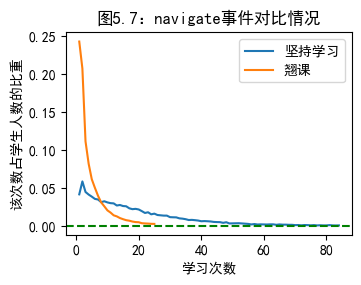

In [15]:
navigate0=pd.read_sql("select navigate,count(navigate)/24961 rate from statistical_information \
where lable=0 and navigate<(select avg(navigate)+3*stddev(navigate) from statistical_information where lable=0) and navigate>0 \
group by(navigate) \
order by(navigate)",con);
navigate1=pd.read_sql("select navigate,count(navigate)/95581 rate from statistical_information \
where lable=1 and navigate<(select avg(navigate)+3*stddev(navigate) from statistical_information where lable=1) and navigate>0 \
group by(navigate) \
order by(navigate)",con);
ax3 = plt.subplot(gs[1,0]);
ax3.plot(navigate0["navigate"],navigate0["rate"],label="坚持学习");
ax3.plot(navigate1["navigate"],navigate1["rate"],label="翘课");
ax3.set_xlabel("学习次数");
ax3.set_ylabel("该次数占学生人数的比重");
ax3.set_title("图5.7：navigate事件对比情况")
ax3.axhline(y=0,c='g',ls='--')
plt.tight_layout(pad=0.3,h_pad=0.3,w_pad=0.3)
plt.legend();
plt.show();


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


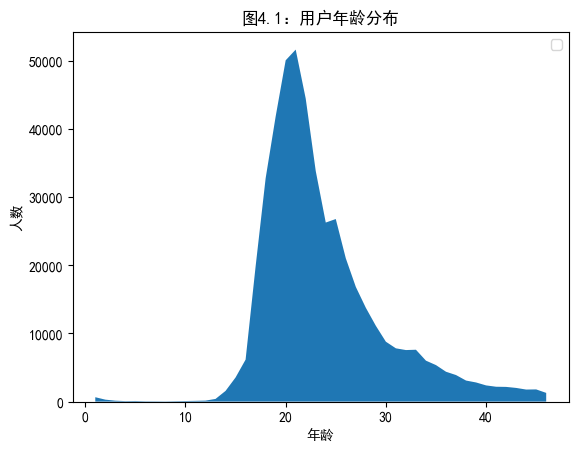

In [16]:
df=pd.read_sql("select 2015-BIRTH age,count(BIRTH) count \
from USER_INFO \
where 2015-BIRTH>0 and 2015-BIRTH<(select avg(2015-BIRTH)+3*stddev(2015-BIRTH) from USER_INFO where 2015-BIRTH>0) \
group by (BIRTH) \
order by age",con);
plt.stackplot(df["age"],df["count"]);
plt.xlabel("年龄");
plt.ylabel("人数");
plt.title("图4.1：用户年龄分布")
plt.legend();
plt.show();

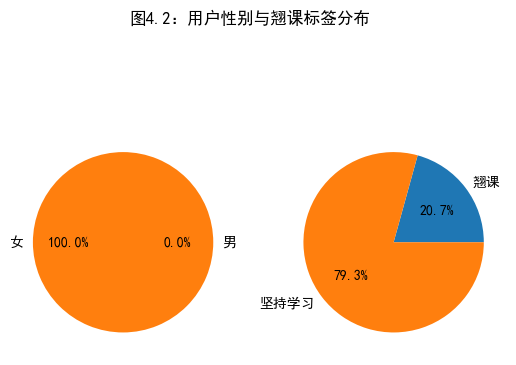

In [17]:
gs = gridspec.GridSpec(1, 2)
fig=plt.figure();
ax1=plt.subplot(gs[0,0])
df=pd.read_sql("select GENDER,count(GENDER) count \
from USER_INFO \
group by (GENDER)",con);
ax1.pie([df.loc[0,"count"],df.loc[2,"count"]],labels=["男","女"],autopct='%3.1f%%');
ax2=plt.subplot(gs[0,1])
df1=pd.read_sql("select lable,count(lable) count \
from TRUTH_TRAIN \
group by (lable)",con);
ax2.pie([df1.loc[0,"count"],df1.loc[1,"count"]],labels=["翘课","坚持学习"],autopct='%3.1f%%')
fig.suptitle("图4.2：用户性别与翘课标签分布")
plt.show()

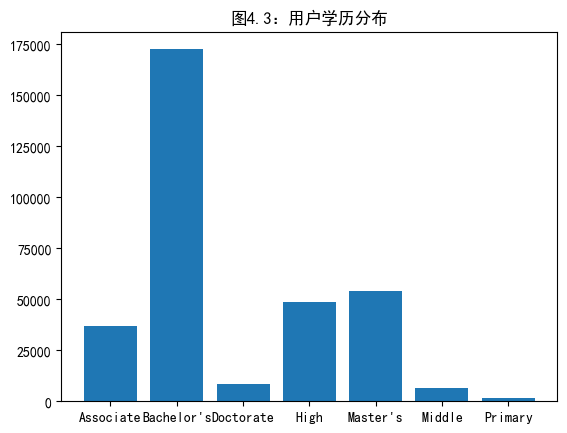

In [18]:
df=pd.read_sql("select EDUCATION,count(EDUCATION) count \
from USER_INFO \
where EDUCATION is not null \
group by EDUCATION",con);
plt.bar(df["EDUCATION"],df["count"]);
plt.title("图4.3：用户学历分布")
plt.show();

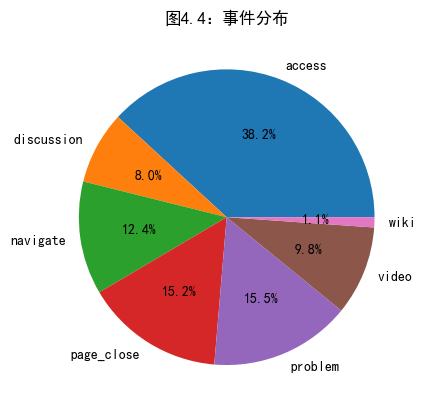

In [19]:
df=pd.read_sql("select EVENT,count(EVENT) count \
from LOG_TRAIN \
group by EVENT",con);
plt.pie(labels=df["EVENT"],x=df["count"],autopct='%3.1f%%');
plt.title("图4.4：事件分布")
plt.show();
